# Swedish Statistics Database
http://www.statistikdatabasen.scb.se/pxweb/en/ssd/

#<font color='red'>We need to plot these against covid cases!</font>


In [0]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
root = '/content/drive/My Drive/STEM Fellowship - Undergrad BDC 2020/Datasets/Sweden Data (for #9)/'
PPI_raw = pd.read_csv(root + 'PPI.csv')
CPI_raw = pd.read_csv(root + 'Sweden CPI.csv')
Un_rate_raw = pd.read_csv(root + 'Unemployment Rate.csv')

# Plotting Swedish CPI (Consumer Price Index (Measure of Inflation))

In [0]:
CPI1 = CPI_raw.T
CPI = CPI1.iloc[1:,:]
CPI.columns = CPI1.iloc[0,:]
time = np.arange('2006-01', '2020-05', dtype='datetime64[M]')

CPI = CPI.set_index(time)

CPI['Date'] = CPI.index
CPI.index = np.arange(0,CPI.shape[0])
col = CPI.pop('Date') # cut the Months column from where it was at the end of the table
CPI.insert(0, col.name, col) # insert the column at column 0 of the data frame

CPI

Month       Date     CPI
0     2006-01-01  279.59
1     2006-02-01   280.9
2     2006-03-01  282.89
3     2006-04-01  284.32
4     2006-05-01  284.76
..           ...     ...
167   2019-12-01  337.68
168   2020-01-01  332.82
169   2020-02-01  334.47
170   2020-03-01  333.91
171   2020-04-01   332.9

[172 rows x 2 columns]

No handles with labels found to put in legend.


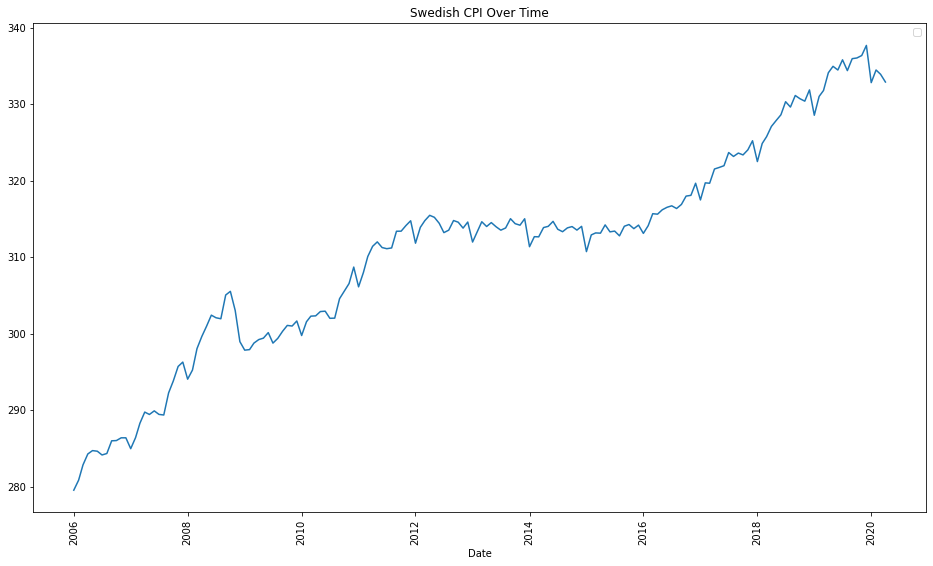

In [0]:
start_date1 = CPI.loc[CPI.Date == np.datetime64('2019-01-01')].index[0]
end_date1 = CPI.loc[CPI.Date == np.datetime64('2020-04-01')].index[0]

fig,ax = plt.subplots()
plt.xticks(rotation = 'vertical')
fig.set_size_inches(16,9)
fig.set_facecolor('w')

plt.plot(CPI.iloc[:,0], CPI.iloc[:, 1])

plt.legend()
plt.title("Swedish CPI Over Time")
plt.xlabel("Date")
plt.show()

During the 2008 recession we see a recovery aproximately like this:
<img src="https://i2.wp.com/www.brookings.edu/wp-content/uploads/2020/05/ES_20200430_Hutchins_recovery_Ushape-01.png?w=768&crop=0%2C0px%2C100%2C9999px&ssl=1" width="300" height="300" />

Its a bit too early to look at what COVID might do but we could potentially model if it followed each of the types of recovery and see what happened.



# Sweden PPI (Producer Price Index)

In [0]:
PPI1 = PPI_raw.T
PPI = PPI1.iloc[1:,:]
PPI.columns = PPI1.iloc[0,:]
time = np.arange('1990-01', '2020-04', dtype='datetime64[M]')

PPI = PPI.set_index(time)

PPI['Date'] = PPI.index
PPI.index = np.arange(0,PPI.shape[0])
col = PPI.pop('Date') # cut the Months column from where it was at the end of the table
PPI.insert(0, col.name, col) # insert the column at column 0 of the data frame

PPI

for i in range(1,6):
  PPI.iloc[:,i] = PPI.iloc[:,i].fillna(0)

PPI

products by SPIN 2015       Date  ... E WATER SUPPLY; SEWERAGE, WASTE MANAGEMENT AND REMEDIATION SERVICES
0                     1990-01-01  ...                                               76.5                 
1                     1990-02-01  ...                                                 72                 
2                     1990-03-01  ...                                               70.9                 
3                     1990-04-01  ...                                               71.8                 
4                     1990-05-01  ...                                               71.8                 
..                           ...  ...                                                ...                 
358                   2019-11-01  ...                                              118.7                 
359                   2019-12-01  ...                                              118.1                 
360                   2020-01-01  ...                                              121.1                 
361                   2020-02-01  ...                                              120.9                 
362                   2020-03-01  ...                                              118.7                 

[363 rows x 6 columns]

## During 2008 Recession

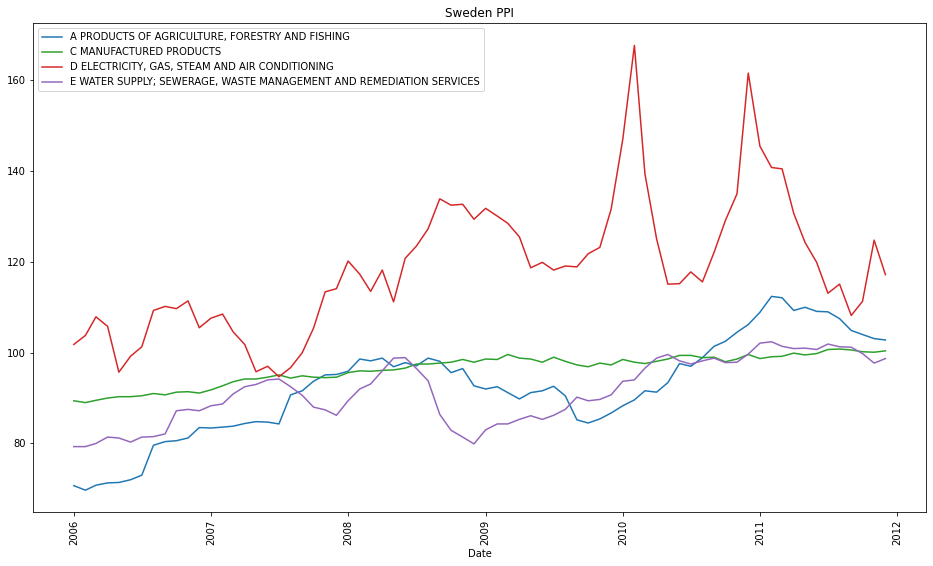

In [0]:
start_date= PPI.loc[PPI.Date == np.datetime64('2006-01-01')].index[0]
end_date= PPI.loc[PPI.Date == np.datetime64('2012-01-01')].index[0]

fig,ax = plt.subplots()
plt.xticks(rotation = 'vertical')
fig.set_size_inches(16,9)
fig.set_facecolor('w')

for column in range(1,PPI.shape[1]):
  try:
    plt.plot(PPI.iloc[start_date:end_date,0], PPI.iloc[start_date:end_date, column],label = f'{PPI.iloc[:,column].name}')
  except: 
    pass

plt.legend()
plt.title('Sweden PPI')
plt.xlabel("Date")
plt.show()



## During COVID

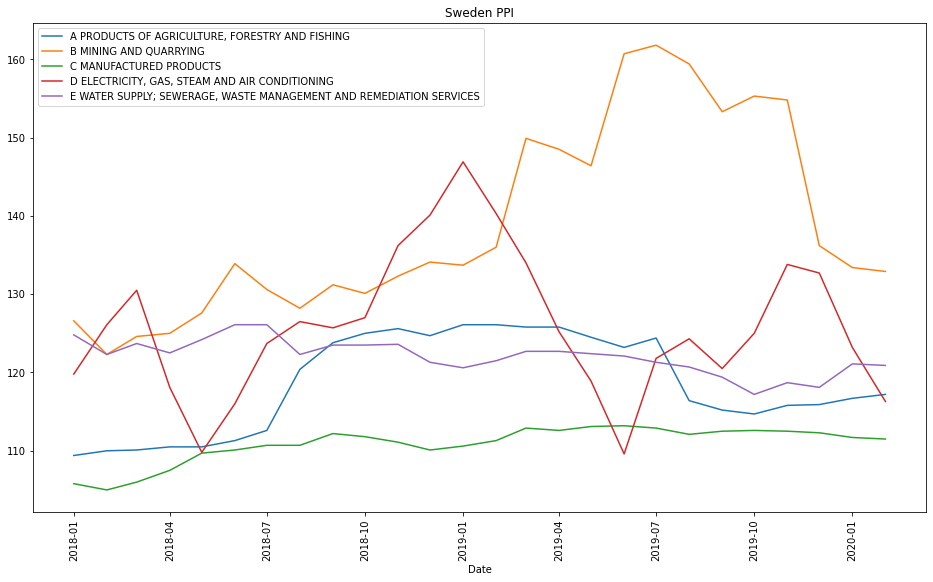

In [0]:
start_date= PPI.loc[PPI.Date == np.datetime64('2018-01-01')].index[0]
end_date= PPI.loc[PPI.Date == np.datetime64('2020-03-01')].index[0]

fig,ax = plt.subplots()
plt.xticks(rotation = 'vertical')
fig.set_size_inches(16,9)
fig.set_facecolor('w')

for column in range(1,PPI.shape[1]):
  try:
    plt.plot(PPI.iloc[start_date:end_date,0], PPI.iloc[start_date:end_date, column],label = f'{PPI.iloc[:,column].name}')
  except: 
    pass

plt.legend()
plt.title('Sweden PPI')
plt.xlabel("Date")
plt.show()

WOW so there are like no trends with this. Mabye that is a good thing actually? if we are expecting swedens economy to not be as affected since their quarantining measures are not as strict then maybe this is okay?

# Swedish Unepmloyment

WOW i really should have made a function for this since ive used it three times now lol.........

In [0]:
# UR stands for Unemployment Rate
UR1 = Un_rate_raw.T
UR = UR1.iloc[1:,:]
UR.columns = UR1.iloc[0,:]
time = np.arange('2013-01', '2020-04', dtype='datetime64[M]')

UR = UR.set_index(time)

UR['Date'] = UR.index
UR.index = np.arange(0,UR.shape[0])
col = UR.pop('Date') # cut the Months column from where it was at the end of the table
UR.insert(0, col.name, col) # insert the column at column 0 of the data frame

UR.columns = ['Date', 'Percent']
#UR.Percent = UR.Percent.astype('float')


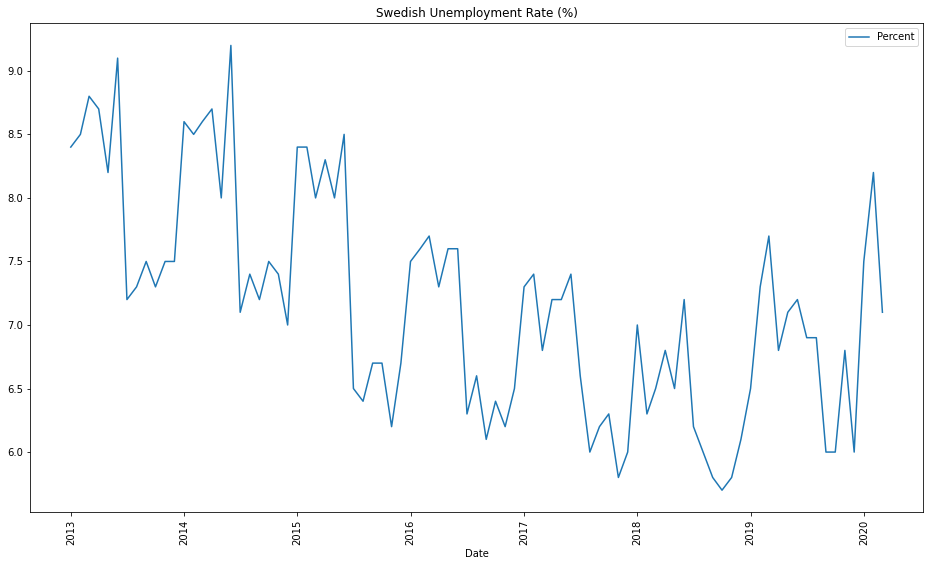

In [0]:
fig,ax = plt.subplots()
plt.xticks(rotation = 'vertical')
fig.set_size_inches(16,9)
fig.set_facecolor('w')

plt.plot(UR.iloc[:,0], UR.iloc[:, 1], label = UR.iloc[:, 1].name)

plt.legend()
plt.title("Swedish Unemployment Rate (%)")
plt.xlabel("Date")
plt.show()


this data is not seasonally adjusted which is why we likely see the pattern of peaks and troughs each year so next i shall plot an average to smooth it out hopefully.

In [0]:
UR['Percent_sma'] = UR.loc[:,['Percent']].rolling(window=12).mean() # simply moving average over a year

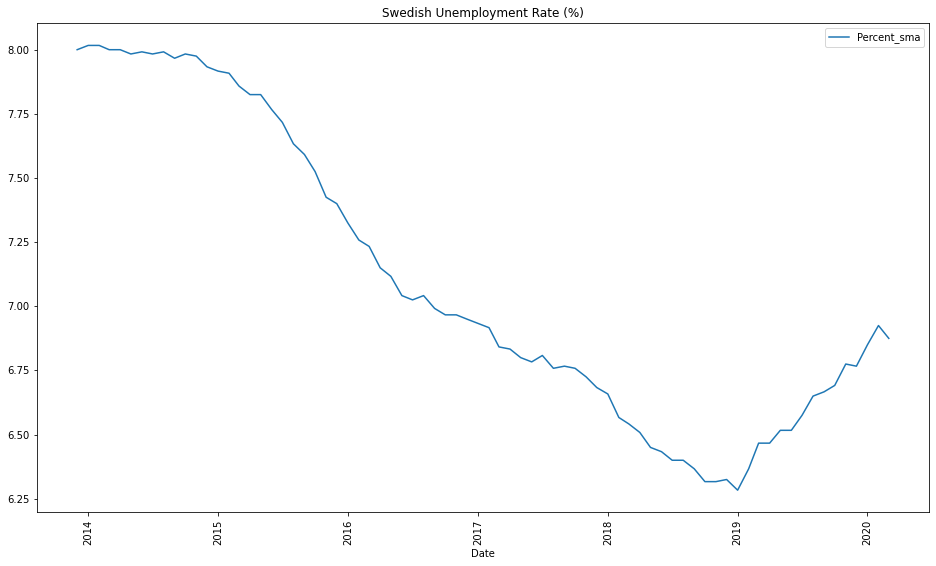

In [0]:
fig,ax = plt.subplots()
plt.xticks(rotation = 'vertical')
fig.set_size_inches(16,9)
fig.set_facecolor('w')

plt.plot(UR.iloc[:,0], UR.iloc[:, 2], label = UR.iloc[:, 2].name)

plt.legend()
plt.title("Swedish Unemployment Rate (%)")
plt.xlabel("Date")
plt.show()

Wow this does not help... i really dont know what this is telling us...